<a href="https://colab.research.google.com/github/anandhramadoss/Loan_Default_Prediction/blob/master/Loan_Default_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

v_dataset_url = 'https://raw.githubusercontent.com/anandhramadoss/Loan_Default_Prediction/master/data/application_data' 
v_file_ext = '.csv'

for i in range(1,9):
  v_new_dataset_url = v_dataset_url + str(i) + v_file_ext
  print(v_new_dataset_url)
  temp_df_ds = pd.read_csv(v_new_dataset_url) # Read all Rows including Header 
  if i==1: 
    df_ds = temp_df_ds
  else:
    df_ds = pd.concat([df_ds, temp_df_ds]) # For subsequent iterations combine the Dataframes 
    
#df_ds1 = pd.read_csv(dataset1_url)
#print('Dataset 1 details')
print(df_ds.shape[0])
print(df_ds.shape[1])



https://raw.githubusercontent.com/anandhramadoss/Loan_Default_Prediction/master/data/application_data1.csv
https://raw.githubusercontent.com/anandhramadoss/Loan_Default_Prediction/master/data/application_data2.csv
https://raw.githubusercontent.com/anandhramadoss/Loan_Default_Prediction/master/data/application_data3.csv
https://raw.githubusercontent.com/anandhramadoss/Loan_Default_Prediction/master/data/application_data4.csv
https://raw.githubusercontent.com/anandhramadoss/Loan_Default_Prediction/master/data/application_data5.csv
https://raw.githubusercontent.com/anandhramadoss/Loan_Default_Prediction/master/data/application_data6.csv
https://raw.githubusercontent.com/anandhramadoss/Loan_Default_Prediction/master/data/application_data7.csv
https://raw.githubusercontent.com/anandhramadoss/Loan_Default_Prediction/master/data/application_data8.csv
307511
122


We will start with the EDA from this section. Start with finding the Data Types for each of the column in the Dataframe. 

In [41]:
df_ds.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 27510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED           

In [42]:
cat_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY', 'TARGET'
                      ]
for col in cat_columns:
    df_ds[col] = pd.Categorical(df_ds[col])
df_ds.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 27510
Data columns (total 122 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        category
 2   NAME_CONTRACT_TYPE            category
 3   CODE_GENDER                   category
 4   FLAG_OWN_CAR                  category
 5   FLAG_OWN_REALTY               category
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT                    float64 
 9   AMT_ANNUITY                   float64 
 10  AMT_GOODS_PRICE               float64 
 11  NAME_TYPE_SUITE               category
 12  NAME_INCOME_TYPE              category
 13  NAME_EDUCATION_TYPE           category
 14  NAME_FAMILY_STATUS            category
 15  NAME_HOUSING_TYPE             category
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  DAYS

Get the Percentage of Null values in each of the column

In [43]:
percent_nulls = df_ds.isnull().sum()/len(df_ds)*100
print(percent_nulls) 

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

Get the Number of columns that has less than 40% of null values. 

In [44]:
lt_40 = list(percent_nulls[percent_nulls.values<40].index)
gt_40 = list(percent_nulls[percent_nulls.values>40].index)
print('Number of columns that has Nulls Greater than 40 Percent - ' + str(len(gt_40)))  
print('Number of columns that has Nulls Less than 40 Percent - ' + str(len(lt_40)))  
gt_40.append('TARGET')
df_ds_nulls = df_ds[gt_40] 
#df_ds_nulls.info(verbose=True)

Number of columns that has Nulls Greater than 40 Percent - 49
Number of columns that has Nulls Less than 40 Percent - 73


Lets plot the heatmap to see if there is any correlation between the Target variable and these features which have more than 40% null values. 

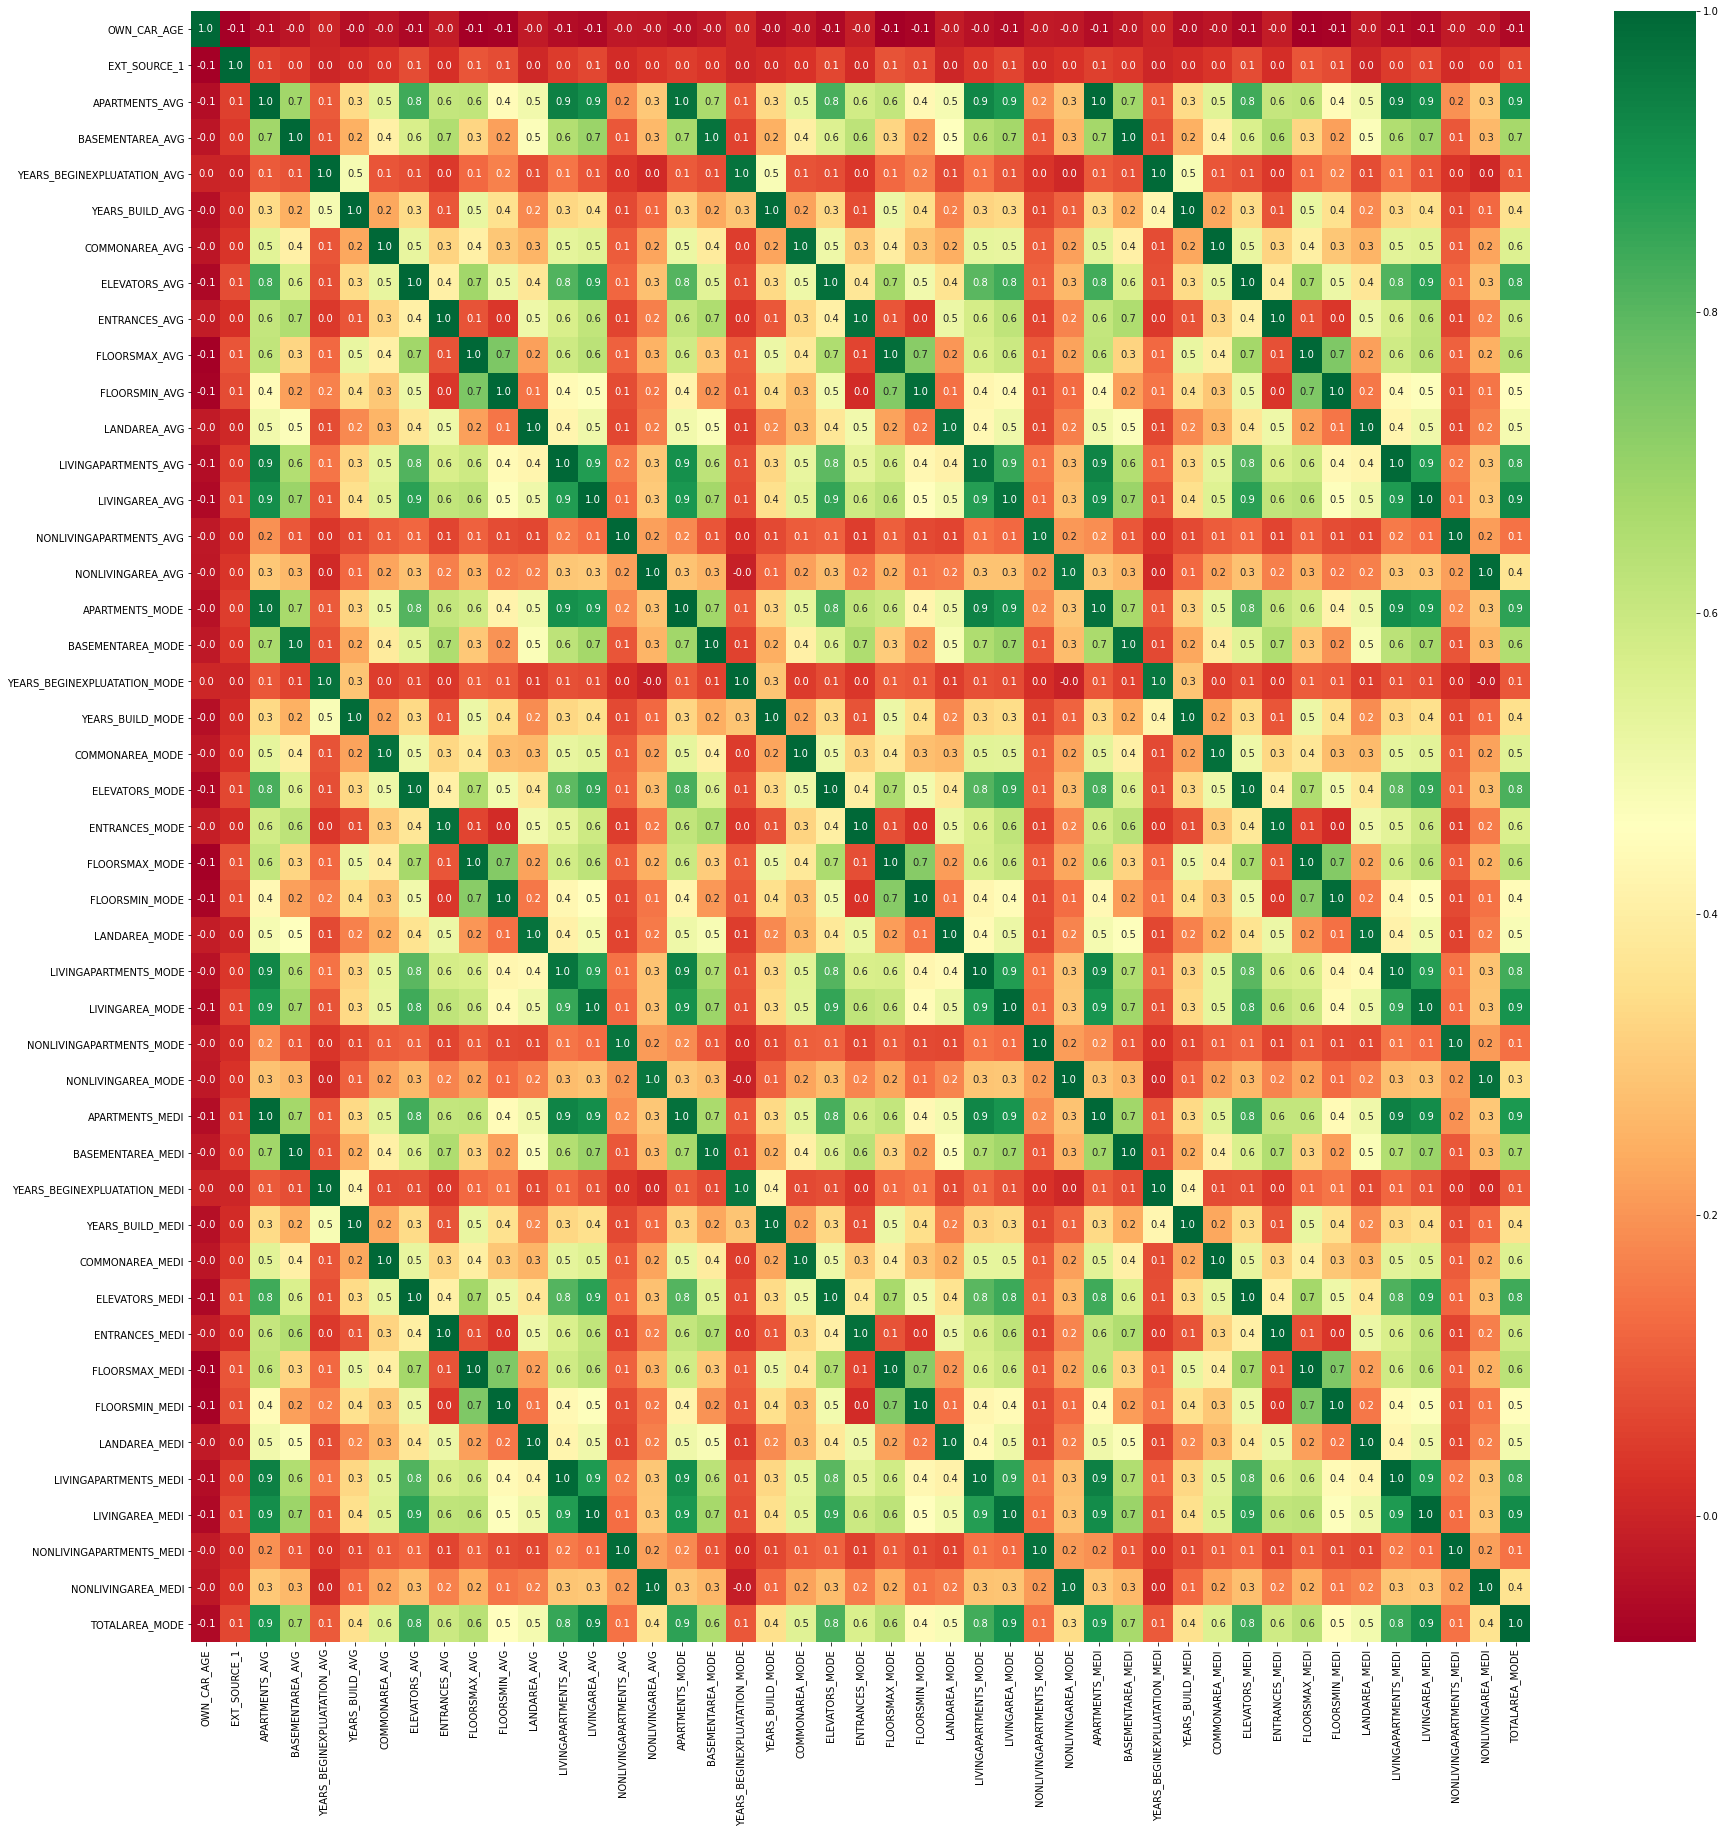

In [ ]:
import seaborn as sns 
plt.figure(figsize=(30,30))
sns.heatmap(df_ds_nulls.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.show() 

Drop those features that has more than 40% null values from the original Dataset.

In [45]:
gt_40.remove('TARGET')
df_ds.drop(labels=gt_40,axis=1,inplace=True) 
df_ds.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 27510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null 

In [46]:
print(df_ds['AMT_ANNUITY'].isnull().sum())
mv_amt_annuity=df_ds['AMT_ANNUITY'].median()
print(mv_amt_annuity) 
df_ds['AMT_ANNUITY'].fillna(value = mv_amt_annuity, inplace =True)
print(df_ds['AMT_ANNUITY'].isnull().sum())

12
24903.0
0


In [47]:
lt_40_fields=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',  'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET']
df_ds = df_ds[lt_40_fields]
df_ds.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152665,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.694465e+05,4363.988632,141275.766519,3522.886321,1509.450419,0.910682,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,20.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Get the Unique values for each of the columns defined in the lt_40_fields list. 

In [48]:
df_ds.nunique()

NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
DAYS_BIRTH                     17460
DAYS_EMPLOYED                  12574
DAYS_REGISTRATION              15688
DAYS_ID_PUBLISH                 6168
OCCUPATION_TYPE                   18
CNT_FAM_MEMBERS                   17
REGION_RATING_CLIENT               3
REGION_RATING_CLIENT_W_CITY        3
ORGANIZATION_TYPE                 58
OBS_30_CNT_SOCIAL_CIRCLE          33
DEF_30_CNT_SOCIAL_CIRCLE          10
OBS_60_CNT_SOCIAL_CIRCLE          33
DEF_60_CNT_SOCIAL_CIRCLE           9
DAYS_LAST_PHONE_CHANGE          3773
A

Now we will get the unique list of few columns. 

In [49]:
df_ds.loc[df_ds.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
df_ds.CODE_GENDER.value_counts()

F      202452
M      105059
XNA         0
Name: CODE_GENDER, dtype: int64

In [50]:
days_birth_lt0 = df_ds['DAYS_BIRTH'].lt(0).sum() 
days_employed_lt0 = df_ds['DAYS_EMPLOYED'].lt(0).sum() 
days_reg_lt0 = df_ds['DAYS_REGISTRATION'].lt(0).sum() 
days_daysid_lt0 = df_ds['DAYS_ID_PUBLISH'].lt(0).sum() 
days_last_phone_lt0 = df_ds['DAYS_LAST_PHONE_CHANGE'].lt(0).sum() 
print(days_birth_lt0)
print(days_employed_lt0)
print(days_reg_lt0)
print(days_daysid_lt0) 
print(days_last_phone_lt0)

307511
252135
307431
307495
269838


In [51]:
df_ds['DAYS_BIRTH'] = abs(df_ds['DAYS_BIRTH']) 
df_ds['DAYS_EMPLOYED'] = abs(df_ds['DAYS_EMPLOYED']) 
df_ds['DAYS_REGISTRATION'] = abs(df_ds['DAYS_REGISTRATION']) 
df_ds['DAYS_ID_PUBLISH'] = abs(df_ds['DAYS_ID_PUBLISH']) 
df_ds['DAYS_LAST_PHONE_CHANGE'] = abs(df_ds['DAYS_LAST_PHONE_CHANGE']) 
days_birth_lt0 = df_ds['DAYS_BIRTH'].lt(0).sum() 
days_employed_lt0 = df_ds['DAYS_EMPLOYED'].lt(0).sum() 
days_reg_lt0 = df_ds['DAYS_REGISTRATION'].lt(0).sum() 
days_daysid_lt0 = df_ds['DAYS_ID_PUBLISH'].lt(0).sum() 
days_last_phone_lt0 = df_ds['DAYS_LAST_PHONE_CHANGE'].lt(0).sum() 
print(days_birth_lt0)
print(days_employed_lt0)
print(days_reg_lt0)
print(days_daysid_lt0) 
print(days_last_phone_lt0)

0
0
0
0
0


Impute the Values of Features using the Statistical properties of the existing data. In the case below we will use Median as the difference between Min and Max is huge for AMT_ANNUITY field 

Next we will plot the Correlation of the features and compare it to the Target variable. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


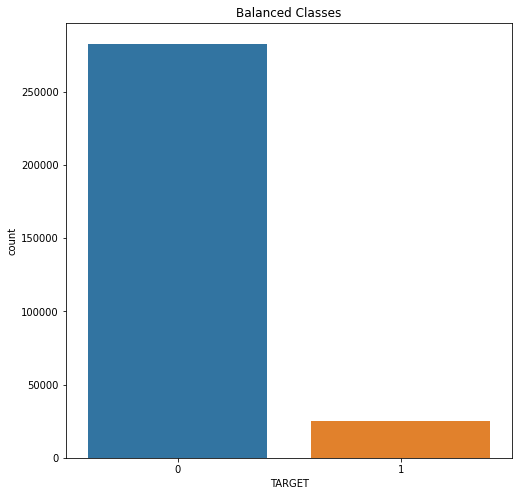

In [52]:
plt.figure(figsize=(8, 8))
sns.countplot('TARGET', data=df_ds)
plt.title('Balanced Classes')
plt.show()


In [53]:
df_ds_target0 = df_ds.loc[df_ds["TARGET"]==0]
df_ds_target1 = df_ds.loc[df_ds["TARGET"]==1]
print(df_ds_target0.shape)
print(df_ds_target1.shape)
df_ds_target1.head(5)

(282686, 34)
(24825, 34)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,Laborers,1.0,2,2,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
26,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,18724,2628,6573.0,1827,Cooking staff,1.0,3,2,Business Entity Type 3,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,1
40,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,17482,1262,1182.0,1029,Laborers,2.0,2,2,Business Entity Type 3,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,1
42,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,13384,3597,45.0,4409,Sales staff,2.0,3,3,Self-employed,1.0,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,1
81,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,24794,365243,5391.0,4199,NaN,2.0,2,2,XNA,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel, SelectKBest, f_classif, chi2, mutual_info_classif
df_ds_minustarget = df_ds
df_ds_minustarget = df_ds_minustarget.drop('TARGET', axis=1)
df_ds_target = df_ds["TARGET"]

First convert the categorical features into a numerical encoded value so that its easy to perform one-hot encoding later 

In [76]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()  
df_ds_minustarget['OCCUPATION_TYPE'] = df_ds_minustarget['OCCUPATION_TYPE'].cat.add_categories('Unknown')
df_ds_minustarget['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

df_ds_minustarget['CODE_GENDER']= le.fit_transform(df_ds_minustarget['CODE_GENDER']) 
df_ds_minustarget['FLAG_OWN_CAR']= le.fit_transform(df_ds_minustarget['FLAG_OWN_CAR']) 
df_ds_minustarget['NAME_CONTRACT_TYPE']= le.fit_transform(df_ds_minustarget['NAME_CONTRACT_TYPE']) 
df_ds_minustarget['FLAG_OWN_REALTY']= le.fit_transform(df_ds_minustarget['FLAG_OWN_REALTY']) 
df_ds_minustarget['NAME_INCOME_TYPE']= le.fit_transform(df_ds_minustarget['NAME_INCOME_TYPE']) 
df_ds_minustarget['NAME_EDUCATION_TYPE']= le.fit_transform(df_ds_minustarget['NAME_EDUCATION_TYPE']) 
df_ds_minustarget['NAME_FAMILY_STATUS']= le.fit_transform(df_ds_minustarget['NAME_FAMILY_STATUS']) 
df_ds_minustarget['NAME_HOUSING_TYPE']= le.fit_transform(df_ds_minustarget['NAME_HOUSING_TYPE']) 
df_ds_minustarget['OCCUPATION_TYPE']= le.fit_transform(df_ds_minustarget['OCCUPATION_TYPE']) 
df_ds_minustarget['REGION_RATING_CLIENT']= le.fit_transform(df_ds_minustarget['REGION_RATING_CLIENT']) 
df_ds_minustarget['REGION_RATING_CLIENT_W_CITY']= le.fit_transform(df_ds_minustarget['REGION_RATING_CLIENT_W_CITY']) 
df_ds_minustarget['ORGANIZATION_TYPE']= le.fit_transform(df_ds_minustarget['ORGANIZATION_TYPE']) 


In [77]:
df_ds_minustarget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 27510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  int64  
 1   CODE_GENDER                  307511 non-null  int64  
 2   FLAG_OWN_CAR                 307511 non-null  int64  
 3   FLAG_OWN_REALTY              307511 non-null  int64  
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  int64  
 10  NAME_EDUCATION_TYPE          307511 non-null  int64  
 11  NAME_FAMILY_STATUS           307511 non-null  int64  
 12  NAME_HOUSING_TYPE            307511 non-null  int64  
 13  

Next we perform One-Hot encoding on the categorical features

In [65]:
cat_columns_new = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

In [66]:
df_ds_to_encode = df_ds_minustarget[cat_columns_new]
df_ds_to_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 27510
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   NAME_CONTRACT_TYPE           307511 non-null  int64
 1   CODE_GENDER                  307511 non-null  int64
 2   NAME_INCOME_TYPE             307511 non-null  int64
 3   NAME_EDUCATION_TYPE          307511 non-null  int64
 4   NAME_FAMILY_STATUS           307511 non-null  int64
 5   NAME_HOUSING_TYPE            307511 non-null  int64
 6   OCCUPATION_TYPE              307511 non-null  int64
 7   ORGANIZATION_TYPE            307511 non-null  int64
 8   FLAG_OWN_CAR                 307511 non-null  int64
 9   FLAG_OWN_REALTY              307511 non-null  int64
 10  REGION_RATING_CLIENT         307511 non-null  int64
 11  REGION_RATING_CLIENT_W_CITY  307511 non-null  int64
dtypes: int64(12)
memory usage: 40.5 MB


In [69]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
onehotencoder = OneHotEncoder() 
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0])], 
                                      remainder='passthrough') 
df_ds_encoded = np.array(columnTransformer.fit_transform(df_ds_to_encode), dtype = np.str)

In [73]:
df_ds_encoded

array([['1.0', '0.0', '1.0', ..., '1.0', '1.0', '1.0'],
       ['1.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0'],
       ['0.0', '1.0', '1.0', ..., '1.0', '1.0', '1.0'],
       ...,
       ['1.0', '0.0', '0.0', ..., '1.0', '2.0', '2.0'],
       ['1.0', '0.0', '0.0', ..., '1.0', '1.0', '1.0'],
       ['1.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0']], dtype='<U32')

Split the Dataset into Train and Test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df_ds_minustarget, df_ds_target, random_state=100, test_size=0.3)
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(215257, 33)
(92254, 33)
(215257,)
(92254,)


Get the Numerical features and apply Variance Selector on them to determine which features have low Variance. 

In [79]:
#x_train_num_fields=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',  'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
#x_train_numerical = X_train[x_train_num_fields] 
x_train_numerical = X_train 
print(x_train_numerical.shape)

(215257, 33)


Below code applies the Variance selector, but we see all 20 numerical columns still exist which tells that none of the features have low variance and cannot be removed through this method. 

In [80]:
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(x_train_numerical)
print(X_train_remove_variance.shape)

(215257, 33)


Next we attempt to do feature selection using Univariate Feature Selection techniques. First we will attempt Chi Square test on individual features and compare it to the Target variable. But before that there are Null values in the numerical columns which will prevent the Chi Square test from running successfully. The below code will replace them with 0. 

In [82]:
x_train_numerical.isnull().sum()
x_train_numerical=x_train_numerical.fillna(0)
x_train_numerical.isnull().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CR

In [84]:
sel_chi2 = SelectKBest(chi2, k=15) # select 10 features 
X_train_chi2 = sel_chi2.fit_transform(x_train_numerical, y_train) 
print(sel_chi2.get_support())

[False  True False False False  True  True  True  True  True  True False
 False  True  True  True  True False False False False  True False  True
 False  True  True False False False False False False]


In the Univariate Feature selection method, next we will attempt to use the F Test and compare it to the Target variable. 


In [85]:
sel_f = SelectKBest(f_classif, k=15)
X_train_f = sel_f.fit_transform(x_train_numerical, y_train) 
print(sel_f.get_support())

[ True  True False False False False False False  True  True  True False
  True  True  True  True  True False False  True  True False False  True
 False  True  True False False False False False False]


In the Univariate Feature selection method, next we will attempt to use the Mutual Info Classifier and compare it to the Target variable.

In [87]:
sel_mutual = SelectKBest(mutual_info_classif, k=15)
X_train_mutual = sel_mutual.fit_transform(x_train_numerical, y_train) 
print(sel_mutual.get_support())

[False  True  True  True False False  True  True False  True  True  True
  True False  True False False  True  True  True  True  True False False
 False False False False False False False False False]


**Recursive Feature Elimination Technique** 
First the estimator is trained on the initial set of features and the importance of each features is obtained. Then the least important feature is removed from the current set of features. This is performed recurvisely until the desired number of features is eventually reached. 
First we will use Logistic Regression as the model for RFE 

In [88]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(solver='lbfgs', max_iter=1000) 
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=15, step=1) 
x_train_rfe_logistic = sel_rfe_logistic.fit_transform(x_train_numerical, y_train) 
print(sel_rfe_logistic.get_support())

[False False False False False  True  True  True  True False  True  True
  True  True  True  True  True  True  True False False  True False False
 False False  True False False False False False False]


Next in the RFE technique, we will use the Random Forest Classifier Model 

In [89]:
from sklearn.ensemble import RandomForestClassifier 
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=15, step=1) 
x_train_rfe_tree = sel_rfe_tree.fit_transform(x_train_numerical, y_train)
print(sel_rfe_tree.get_support())

[False False False False False  True  True  True  True False False False
 False  True  True  True  True  True  True False False  True  True False
  True False  True False False False False False  True]


Next we compare the performance of the model before and after feature selection 

In [90]:
model_logistic = LogisticRegression(solver='saga', max_iter=10000)
model_logistic.fit(X_train, y_train)
predict = model_logistic.predict(X_test)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

ValueError: ignored

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215257 entries, 21932 to 20552
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           215257 non-null  category
 1   CODE_GENDER                  215257 non-null  category
 2   FLAG_OWN_CAR                 215257 non-null  category
 3   FLAG_OWN_REALTY              215257 non-null  category
 4   CNT_CHILDREN                 215257 non-null  category
 5   AMT_INCOME_TOTAL             215257 non-null  float64 
 6   AMT_CREDIT                   215257 non-null  float64 
 7   AMT_ANNUITY                  215257 non-null  float64 
 8   AMT_GOODS_PRICE              215062 non-null  float64 
 9   NAME_INCOME_TYPE             215257 non-null  category
 10  NAME_EDUCATION_TYPE          215257 non-null  category
 11  NAME_FAMILY_STATUS           215257 non-null  category
 12  NAME_HOUSING_TYPE            215257 non-n